# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

In [13]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Material and methods

In [2]:
# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [3]:
# Creating structures to access easily data and results

# Adjacencies
ALL_ADJ=DECLONE_adjacencies_list()
ANC_ADJ=[adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)=="ANCESTRAL"]
EXTANT_ADJ=[adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)!="ANCESTRAL"]
SCAFF_ADJ=[adj for adj in EXTANT_ADJ if DECLONE_adj_score(adj)<1.0]
# Species
__ALL_SP_AUX={}
for adj in ALL_ADJ:
    __ALL_SP_AUX[(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj))]=1
ALL_SPECIES=[sp for sp in __ALL_SP_AUX.keys()]
EXTANT_SPECIES=[sp for sp in ALL_SPECIES if sp[1]!="ANCESTRAL"]
ANC_SPECIES=[sp for sp in ALL_SPECIES if sp[1]=="ANCESTRAL"]

### Material

*Species tree (figure below), genes, chromosomes/scaffolds/contigs, gene families/orthogroups, gene trees*

![Species tree](images/anopheles_species_tree_labeled.png "*Anopheles* species tree")

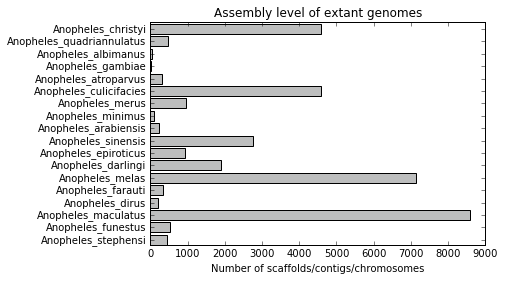

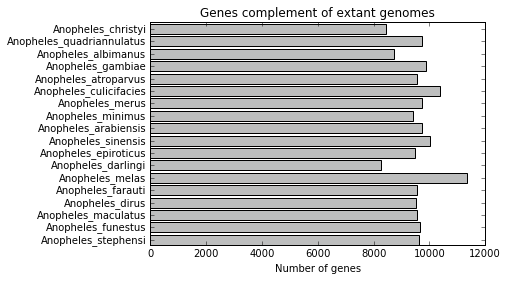

In [4]:
# Plotting the fragmentation and number of genes of each genome
GENOMES_EXTANT_FRAGMENTATION={sp[1]: {0: GENOMES_nbscf(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_FRAGMENTATION, 1, 0.5, xlabel, title,0.8)

GENOMES_EXTANT_NBGENES={sp[1]: {0: GENOMES_nbgenes(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of genes"
title  = "Genes complement of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_NBGENES, 1, 0.5, xlabel, title,0.8)

### Methods

*ProfileNJ, DeClone, ADSeq, ideally joined into a single tool*

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [5]:
# Here we record the number of adjacencies and conflicts for all species with adjacencies binned by bins of score 0.1
NB_BINS=10 # Binning the adjacencies by bins of size 0.1: bin i contains adjacencies of score <=0.1*i and < 0.1*(i+1)
IVALUES=range(0,NB_BINS+1)
ALL_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ALL_SPECIES}
ANC_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
EXTANT_ADJ_DISTRIB = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
SCAFF_ADJ_DISTRIB  = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
for adj in ALL_ADJ: 
    (score,species) = (DECLONE_adj_score(adj), (DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    score_bin=math.floor(score*NB_BINS)
    ALL_ADJ_DISTRIB[species][score_bin]+=1
    if species[1]=="ANCESTRAL":
        ANC_ADJ_DISTRIB[species][score_bin]+=1
    else:
        EXTANT_ADJ_DISTRIB[species][score_bin]+=1
        if score<1.0:
            SCAFF_ADJ_DISTRIB[species][score_bin]+=1

### Gene trees

*To do: describe the improvement of the new gene trees, gene content, duplications, ...*

### Scaffolding extant genomes: overview

In this section, we present a general overview of the scaffolding adjacencies inferred by the methods ADseq+DeClone.

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_chris	902	2	28	53	156	85	123	75	77	3119
Anopheles_minim	19	0	0	1	1	2	0	0	2	24
Anopheles_funes	81	0	11	12	6	10	2	10	21	333
Anopheles_atrop	121	24	8	4	1	4	1	1	2	41
Anopheles_steph	59	2	0	4	10	24	4	11	5	255
Anopheles_merus	216	4	1	5	15	17	24	20	37	583
Anopheles_macul	1795	48	164	343	1588	325	55	186	69	5638
Anopheles_quadr	115	4	14	11	8	15	12	10	8	240
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_darli	46	0	3	7	6	16	7	4	46	706
Anopheles_farau	21	0	1	1	4	3	2	11	4	181
Anopheles_dirus	23	0	3	0	3	1	1	5	3	66
Anopheles_sinen	330	21	66	120	163	201	82	44	68	1552
Anopheles_culic	1124	12	25	132	289	291	149	69	66	3627
Anopheles_arabi	154	35	27	19	11	6	10	8	10	61
Anopheles_epiro	231	14	5	8	17	31	13	30	26	601
Anopheles_melas	2873	76	539	616	1302	870	91	394	122	3861
Anopheles_albim	2	0	0	0	0	0	0	0	0	0


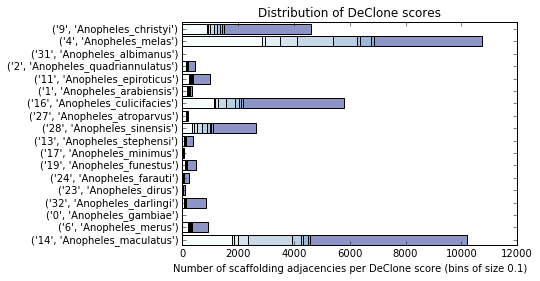

In [6]:
# Filtering for extant scaffolding adjacencies
IVALUES1=range(0,NB_BINS)
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_ADJ_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(SCAFF_ADJ_DISTRIB, NB_BINS, 1.0, xlabel, title, 0.8)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, although for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. 

We now look at the number of conflicts, defined as either a gene with three or more neighbours, without accounting for gene orientation in extant species.

In [10]:
# We now look at the conflicts, again binned in terms of adjacencies score
ANC_CONF_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
SCAFF_CONF_DISTRIB  = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
__NGB_ALL={} # Number of neighbours of genes, indexed by pairs (tree,node)
for adj in ALL_ADJ: # Initializing the tables
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    __NGB_ALL[gene1]={t : 0 for t in IVALUES}
    __NGB_ALL[gene2]={t : 0 for t in IVALUES}
for adj in ALL_ADJ: # Filling the tables of gege neighbours
    (score,species)=(DECLONE_adj_score(adj),(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    score_bin=math.floor(score*NB_BINS)
    for i in range (0,score_bin+1):
        __NGB_ALL[gene1][i]+=1
        __NGB_ALL[gene2][i]+=1
for adj in ALL_ADJ: # Filling the tables
    (score,species)=(DECLONE_adj_score(adj),(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    score_bin=math.floor(score*NB_BINS)
    if __NGB_ALL[gene1][score_bin]>=3 or __NGB_ALL[gene2][score_bin]>=3:
        if species[1]=="ANCESTRAL":
            ANC_CONF_DISTRIB[species][score_bin]+=1
        else:
            SCAFF_CONF_DISTRIB[species][score_bin]+=1

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_chris	745	1	15	39	118	39	44	25	21	345
Anopheles_minim	12	0	0	1	0	0	0	0	0	0
Anopheles_funes	64	0	9	10	3	6	0	2	4	15
Anopheles_atrop	114	24	8	0	0	0	0	1	0	0
Anopheles_steph	36	1	0	2	9	15	1	2	1	10
Anopheles_merus	120	3	0	2	11	8	3	6	9	56
Anopheles_macul	1619	45	146	322	1305	284	31	106	43	1403
Anopheles_quadr	90	4	9	3	6	5	6	3	4	23
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_darli	35	0	3	6	3	13	0	0	11	31
Anopheles_farau	14	0	0	0	3	0	0	2	0	3
Anopheles_dirus	17	0	2	0	0	0	0	1	2	7
Anopheles_sinen	274	18	60	108	125	153	21	19	22	150
Anopheles_culic	1002	10	20	124	254	231	69	49	43	963
Anopheles_arabi	147	35	25	16	7	3	5	2	3	8
Anopheles_epiro	196	14	4	5	10	19	4	9	2	47
Anopheles_melas	2759	74	507	563	1199	652	41	137	44	719
Anopheles_albim	0	0	0	0	0	0	0	0	0	0


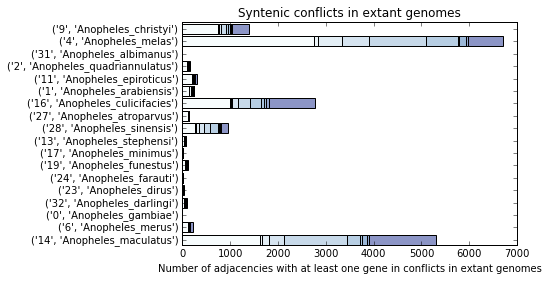

In [11]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_CONF_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of adjacencies with at least one gene in conflicts in extant genomes"
title = "Syntenic conflicts in extant genomes"
plot_scores_distribution_per_species(SCAFF_CONF_DISTRIB, NB_BINS, 1.0, xlabel, title,0.8)

### *Anopheles funestus* scaffolding

### Ancestral genomes and evolution

The DeClone/ADseq method infers both extant and ancestral adjacencies, thus paving the way to analyse the evolution of genome organization over the considered species tree.

#### Overview of ancestral adjacencies



We first look at the distribution of scores of ancestral adjacencies and at the number of conflicts.

**Note[CC]** The graph for conflicts looks suspicious, for the column "<1.0".

sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
25	1833	26	107	102	206	98	104	76	69	5115	5468
34	580	12	35	139	93	140	97	63	34	7946	0
5	3439	53	92	159	163	225	293	354	275	8950	2652
12	2424	47	75	125	126	140	151	159	181	5448	6637
20	2370	29	39	62	112	121	85	91	100	4658	6849
18	2296	33	56	55	131	113	114	118	111	7339	3746
21	2342	27	54	69	96	131	111	114	111	4794	7207
15	2131	33	70	64	223	130	108	175	121	10140	579
7	3749	56	164	156	241	207	235	228	224	6201	5873
33	640	11	25	46	44	59	118	81	107	5547	2938
22	2230	61	127	117	114	135	148	127	143	4279	8081
3	3050	60	70	67	64	69	82	161	224	3683	6543
30	1050	22	100	150	138	191	119	70	57	5331	5153
10	2433	26	89	104	177	182	266	246	172	8619	3233
26	1657	31	138	169	138	153	107	99	77	4644	7053
8	3744	65	202	224	236	429	204	183	178	5820	6106
29	1435	32	69	70	173	74	121	105	98	5142	4469


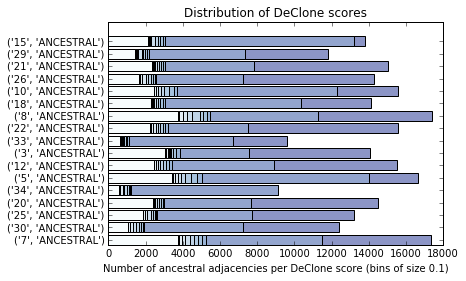

sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
25	1819	26	105	95	179	83	86	56	49	2004	3
34	559	10	33	77	58	56	30	21	6	733	0
5	3437	53	87	150	155	212	270	302	211	3487	0
12	2409	47	74	119	120	130	132	124	132	3675	0
20	2368	28	39	60	107	116	75	79	75	2862	0
18	2292	33	53	52	116	99	86	102	82	3013	0
21	2339	26	51	67	92	127	96	100	95	3295	66
15	2123	33	69	62	167	101	86	142	77	3112	0
7	3747	56	162	149	232	195	216	193	171	3420	0
33	623	10	23	41	37	47	48	38	27	652	0
22	2223	58	125	111	111	126	135	110	111	3008	348
3	3043	57	62	61	57	46	67	121	182	1246	0
30	1029	20	91	134	119	159	89	54	43	2182	6
10	2420	25	84	95	162	164	234	217	124	4105	0
26	1649	30	134	158	129	137	93	81	64	2773	66
8	3741	64	197	213	228	417	181	123	122	3018	0
29	1405	31	62	58	138	56	66	58	40	1119	0


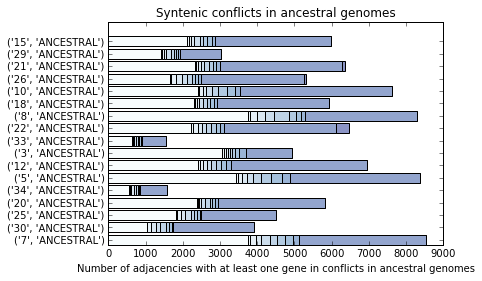

In [12]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_ADJ_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of ancestral adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(ANC_ADJ_DISTRIB, NB_BINS+1, 1.0, xlabel, title, 0.8)

# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_CONF_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of adjacencies with at least one gene in conflicts in ancestral genomes"
title = "Syntenic conflicts in ancestral genomes"
plot_scores_distribution_per_species(ANC_CONF_DISTRIB, NB_BINS+1, 1.0, xlabel, title,0.8)

## Discussion

## References